In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

import time

In [16]:
forest = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [17]:
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [18]:
forest.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [19]:
 # Winter = 1, Spring = 2, Summer = 3, Fall = 4
 
 month_int_season = {
    'jan' : [1, "1"],
    'feb' : [2, "1"],
    'mar' : [3, "2"],
    'apr' : [4, "2"],
    'may' : [5, "2"],
    'jun' : [6, "3"],
    'jul' : [7, "3"],
    'aug' : [8, "3"],
    'sep' : [9, "4"],
    'oct' : [10, "4"],
    'nov' : [11, "4"],
    'dec' : [12, "1"]
}

forest["month_int_season"] = forest['month'].map(month_int_season) 
forest[['month_int','season']] = pd.DataFrame(forest.month_int_season.to_list())

forest = forest.sort_values(['month_int']).reset_index(drop=True)
forest = forest.drop(["month_int_season","month","day"], axis=1)

forest.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_int,season
0,2,4,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,1,1
1,4,5,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,1,1
2,3,4,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,2,1
3,2,2,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00,2,1
4,7,4,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,2,1


In [22]:
X = forest.drop(['season'], axis=1)
y = forest['season']

#df = pd.get_dummies(forest,["day", "month"])

In [23]:
Kmeans =  KMeans(n_clusters=3).fit(X.values)

In [24]:
Kmeans_3 = pd.DataFrame(Kmeans.labels_, columns=["cluster"])

Kmeans.cluster_centers_

array([[5.25000000e+00, 4.60937500e+00, 9.06234375e+01, 8.60453125e+01,
        4.12421875e+02, 9.11718750e+00, 1.87218750e+01, 4.33281250e+01,
        4.62500000e+00, 3.12500000e-03, 1.25470312e+01, 7.67187500e+00],
       [4.92473118e+00, 4.45161290e+00, 8.64774194e+01, 2.93688172e+01,
        7.50580645e+01, 6.39892473e+00, 1.24365591e+01, 4.68494624e+01,
        4.55376344e+00, 2.15053763e-03, 5.17419355e+00, 3.19354839e+00],
       [4.50000000e+00, 4.20555556e+00, 9.17250000e+01, 1.36341111e+02,
        6.94193333e+02, 9.68222222e+00, 2.05858333e+01, 4.37972222e+01,
        3.77111111e+00, 3.00000000e-02, 1.48828889e+01, 8.54722222e+00]])

In [25]:
pca = PCA(n_components=2).fit(X)
pca_Trans = pca.transform(X)
pca_Trans

array([[549.54860152,  -6.59810838],
       [391.11717749, -11.87301016],
       [528.04628501,  -6.2526809 ],
       ...,
       [206.52616148,  -5.0457156 ],
       [210.50560371,  -3.63901279],
       [210.33638336,   8.57977378]])

In [26]:
pca_Trans_DF = pd.DataFrame(pca_Trans, columns=["pca1", "pca2"])
pca_Trans_DF

Kmeans_3=pd.concat([Kmeans_3, pca_Trans_DF], axis=1)

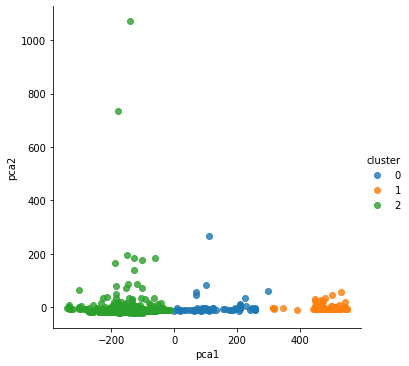

In [27]:
fig = sns.lmplot(x="pca1", y="pca2", data = Kmeans_3, hue="cluster", fit_reg=False)
plt.show()

In [28]:
clusterRange = range(2,11)
objfuncs = []
for i in clusterRange:
    T = KMeans(n_clusters=i).fit(X)
    print("obj. Func.:", T.inertia_)
    objfuncs.append(T.inertia_)

obj. Func.: 8353660.047907899
obj. Func.: 5568976.997518653
obj. Func.: 3923284.965065096
obj. Func.: 2891082.8315932374
obj. Func.: 2219831.9156583296
obj. Func.: 1869388.7584692745
obj. Func.: 1631917.590420429
obj. Func.: 1390326.397360735
obj. Func.: 1206450.0573521268


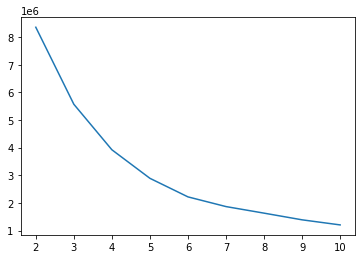

In [29]:
plt.plot(clusterRange, objfuncs)

In [30]:
df["test"] = (df["area"] > df["area"].median()).astype(int)

In [31]:
df.sample(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,day_oct,day_sep,month_fri,month_mon,month_sat,month_sun,month_thu,month_tue,month_wed,test
176,6,5,81.5,9.1,55.2,2.7,5.8,54,5.8,0.0,...,0,0,0,0,0,0,1,0,0,1
292,4,5,91.6,100.2,466.3,6.3,22.9,40,1.3,0.0,...,0,0,1,0,0,0,0,0,0,1


In [32]:
X =  df.drop(["area", "test"],axis = 1)

In [33]:
X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,day_nov,day_oct,day_sep,month_fri,month_mon,month_sat,month_sun,month_thu,month_tue,month_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
y = df["test"]

In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: test, dtype: int64

In [36]:
scores = []
skf = StratifiedKFold(n_splits=5)
for trainIndex, testIndex in skf.split(X, y):
    xTrain, xTest = X.iloc[trainIndex], X.iloc[testIndex]
    yTrain, yTest = y.iloc[trainIndex], y.iloc[testIndex]
    kmeans = KMeans(n_clusters=3).fit(xTrain)
    yPred = kmeans.predict(xTest)
    scores.append(f1_score(yTest, yPred, average="micro"))
print(np.mean(scores))

0.4701269604182226


In [37]:
scores

[0.46153846153846156,
 0.4230769230769231,
 0.47572815533980584,
 0.5242718446601942,
 0.46601941747572817]

In [38]:
results = pd.DataFrame(columns=["algorithm", "transformed", "avg_mse", "time_taken"])

algorithms = {
    KMeans.__name__: KMeans(n_clusters=3),
    AgglomerativeClustering.__name__: AgglomerativeClustering(),
    GaussianMixture.__name__: GaussianMixture(),
}

skf = StratifiedKFold(n_splits=5)


for key, model in algorithms.items():
    start_time = time.time()
    print(f"*****Performing {key} algorithm on original dataset*****")
    scores = []
    for trainIndex, testIndex in skf.split(X, y):
        xTrain, xTest = X.iloc[trainIndex], X.iloc[testIndex]
        yTrain, yTest = y.iloc[trainIndex], y.iloc[testIndex]
        
        m = model.fit(xTrain)
        if key =="AgglomerativeClustering":
            yPred = m.fit_predict(xTest)
        else:
            yPred = m.predict(xTest)
        scores.append(f1_score(yTest, yPred, average="micro"))
        
    end_time = time.time()
    time_taken = end_time - start_time
    avg_mse = np.mean(scores)
    # collating results like INEC
    results = results.append({"algorithm": key, "transformed":"No", "avg_mse": avg_mse, "time_taken":time_taken}, ignore_index=True)
        
    print(f"The average f1 score of {key} is {avg_mse} \n")

*****Performing KMeans algorithm on original dataset*****
The average f1 score of KMeans is 0.33048917102315156 

*****Performing AgglomerativeClustering algorithm on original dataset*****
The average f1 score of AgglomerativeClustering is 0.5204630321135175 

*****Performing GaussianMixture algorithm on original dataset*****
The average f1 score of GaussianMixture is 0.5009708737864077 



In [39]:
results

,algorithm,transformed,avg_mse,time_taken
0,KMeans,No,0.330489,0.209145
1,AgglomerativeClustering,No,0.520463,0.053503
2,GaussianMixture,No,0.500971,0.083046


### PCA ANALYSIS

In [40]:
pca = PCA(n_components=2).fit(X)
pca_Trans = pca.transform(X)

X_pca = pd.DataFrame(pca_Trans)

X_pca.head()

,0,1
0,461.616304,-1.723350
1,-105.642727,-96.508520
2,-124.601307,-91.620793
3,476.910420,10.990015
4,449.364542,24.345316


In [41]:

for key, model in algorithms.items():
    start_time = time.time()
    print(f"*****Performing {key} algorithm on PCA transformed dataset*****")
    scores = []
    for trainIndex, testIndex in skf.split(X_pca, y):
        xTrain, xTest = X_pca.iloc[trainIndex], X_pca.iloc[testIndex]
        yTrain, yTest = y.iloc[trainIndex], y.iloc[testIndex]
        
        m = model.fit(xTrain)
        if key =="AgglomerativeClustering":
            yPred = m.fit_predict(xTest)
        else:
            yPred = m.predict(xTest)
        scores.append(f1_score(yTest, yPred, average="micro"))
        #print(f"Scores array is {scores}")
        
    end_time = time.time()
    time_taken = end_time - start_time
    avg_mse = np.mean(scores)
    # collating results like INEC
    results = results.append({"algorithm": key, "transformed":"PCA", "avg_mse": avg_mse, "time_taken":time_taken}, ignore_index=True)
        
    print(f"The average f1 score of {key} is {avg_mse} \n")

*****Performing KMeans algorithm on PCA transformed dataset*****
The average f1 score of KMeans is 0.33226288274831967 

*****Performing AgglomerativeClustering algorithm on PCA transformed dataset*****
The average f1 score of AgglomerativeClustering is 0.518521284540702 

*****Performing GaussianMixture algorithm on PCA transformed dataset*****
The average f1 score of GaussianMixture is 0.5009708737864077 



In [42]:
results

,algorithm,transformed,avg_mse,time_taken
0,KMeans,No,0.330489,0.209145
1,AgglomerativeClustering,No,0.520463,0.053503
2,GaussianMixture,No,0.500971,0.083046
3,KMeans,PCA,0.332263,0.212024
4,AgglomerativeClustering,PCA,0.518521,0.035161
5,GaussianMixture,PCA,0.500971,0.032821


In [43]:
scaling_algorithms = {
    StandardScaler.__name__: StandardScaler(),
    MinMaxScaler.__name__: MinMaxScaler(feature_range=(0,1)),
    Normalizer.__name__: Normalizer(),
}

for name, scaler in scaling_algorithms.items():
    print(f"Performing {name}\n")
    X_transform = scaler.fit_transform(X)
    X_transform = pd.DataFrame(X_transform)
    start_time = time.time()
    for key, model in algorithms.items():
        print(f"*****Performing {key} algorithm on dataset transformed using {name}*****")
        scores = []
        for trainIndex, testIndex in skf.split(X_transform, y):
            xTrain, xTest = X_transform.iloc[trainIndex], X_transform.iloc[testIndex]
            yTrain, yTest = y.iloc[trainIndex], y.iloc[testIndex]

            m = model.fit(xTrain)
            if key =="AgglomerativeClustering":
                yPred = m.fit_predict(xTest)
            else:
                yPred = m.predict(xTest)
            scores.append(f1_score(yTest, yPred, average="micro"))
            #print(f"Scores array is {scores}")
        end_time = time.time()
        time_taken = end_time - start_time
        avg_mse = np.mean(scores)
        # collating results like INEC
        results = results.append({"algorithm": key, "transformed":name, "avg_mse": avg_mse, "time_taken":time_taken}, ignore_index=True)
        
        print(f"The average f1 score of {key} is {avg_mse} \n")
#         print(f"The average f1 score of {key} is {np.mean(scores)} \n")
    
#     end_time = time.time()
    
#     print(f"\nTime taken is {(end_time - start_time): .2f} seconds")

Performing StandardScaler

*****Performing KMeans algorithm on dataset transformed using StandardScaler*****
The average f1 score of KMeans is 0.3734503360716953 

*****Performing AgglomerativeClustering algorithm on dataset transformed using StandardScaler*****
The average f1 score of AgglomerativeClustering is 0.5299477221807318 

*****Performing GaussianMixture algorithm on dataset transformed using StandardScaler*****
The average f1 score of GaussianMixture is 0.5009708737864077 

Performing MinMaxScaler

*****Performing KMeans algorithm on dataset transformed using MinMaxScaler*****
The average f1 score of KMeans is 0.30537714712471997 

*****Performing AgglomerativeClustering algorithm on dataset transformed using MinMaxScaler*****
The average f1 score of AgglomerativeClustering is 0.5070575056011949 

*****Performing GaussianMixture algorithm on dataset transformed using MinMaxScaler*****
The average f1 score of GaussianMixture is 0.5009708737864077 

Performing Normalizer

****

In [44]:
results

,algorithm,transformed,avg_mse,time_taken
0,KMeans,No,0.330489,0.209145
1,AgglomerativeClustering,No,0.520463,0.053503
2,GaussianMixture,No,0.500971,0.083046
3,KMeans,PCA,0.332263,0.212024
4,AgglomerativeClustering,PCA,0.518521,0.035161
5,GaussianMixture,PCA,0.500971,0.032821
6,KMeans,StandardScaler,0.373450,0.186276
7,AgglomerativeClustering,StandardScaler,0.529948,0.238966
8,GaussianMixture,StandardScaler,0.500971,0.286100
9,KMeans,MinMaxScaler,0.305377,0.128300


In [47]:
results.sort_values(by=["time_taken"], ascending=True)

,algorithm,transformed,avg_mse,time_taken
5,GaussianMixture,PCA,0.500971,0.032821
4,AgglomerativeClustering,PCA,0.518521,0.035161
1,AgglomerativeClustering,No,0.520463,0.053503
2,GaussianMixture,No,0.500971,0.083046
9,KMeans,MinMaxScaler,0.305377,0.128300
12,KMeans,Normalizer,0.402857,0.143435
10,AgglomerativeClustering,MinMaxScaler,0.507058,0.178795
6,KMeans,StandardScaler,0.373450,0.186276
13,AgglomerativeClustering,Normalizer,0.531964,0.196595
0,KMeans,No,0.330489,0.209145
